In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [63]:
df = pd.read_excel('final_reviewed (1).xlsx')
df.head(20)

,Sentiment,Translated,Satisfied/Helpful,Service/Communication,Hardware,Software,Slow,Up-to-date,Confusing,Helpdesk,...,Issues solving,Access,Negative,Language,Expertise,Costs,Online / Remote,Digitalization,Others,Order Process
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,negative,this needs to be changed!!!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,neutral,Great competence in the organization organizat...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,positive,Digitization at BASF is on the right track. GD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
6,positive,"High expertise, motivated employees",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,negative,"tough and complicated processes, high overhead...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,neutral,cheaper alternatives available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
10,neutral,I think GD is a good guy. They gave us a lot o...,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
12,positive,Global Digital Services are the greatest on ea...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df['Language']

1      NaN
2      NaN
4      NaN
5      NaN
6      NaN
8      NaN
9      NaN
10     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     1.0
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
      ... 
843    NaN
844    NaN
845    NaN
846    NaN
847    NaN
848    NaN
849    NaN
850    NaN
851    NaN
852    NaN
853    NaN
854    NaN
855    NaN
856    NaN
857    NaN
858    NaN
859    NaN
860    NaN
861    NaN
862    NaN
863    NaN
864    NaN
865    NaN
866    NaN
867    NaN
868    NaN
869    NaN
870    NaN
871    NaN
872    NaN
Name: Language, Length: 873, dtype: float64

In [3]:
nps_scores = df['Wie wahrscheinlich ist es, dass Sie Global Digital Services einem Kollegen*in empfehlen?']

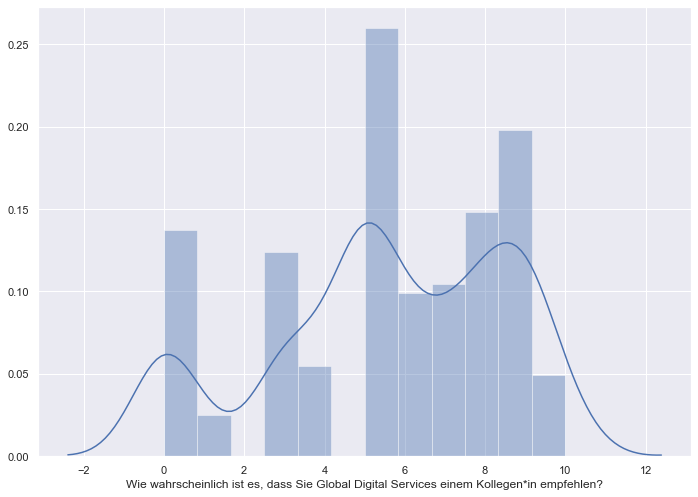

In [48]:
sns.distplot(nps_scores)

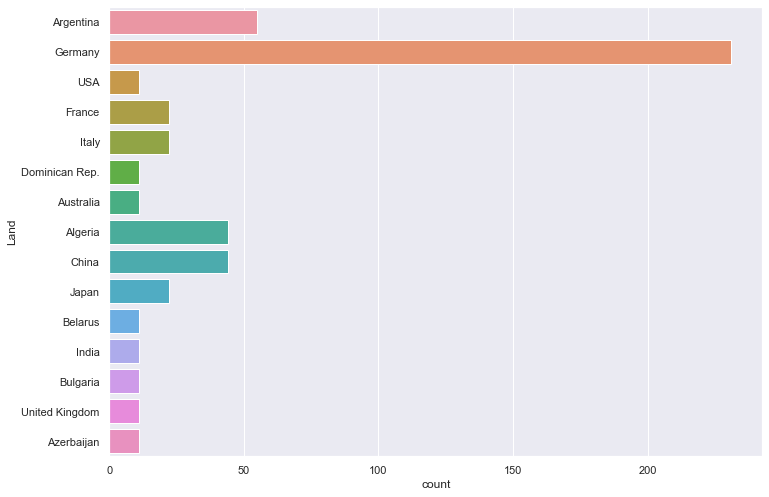

In [49]:
sns.countplot(y='Land', data=df)

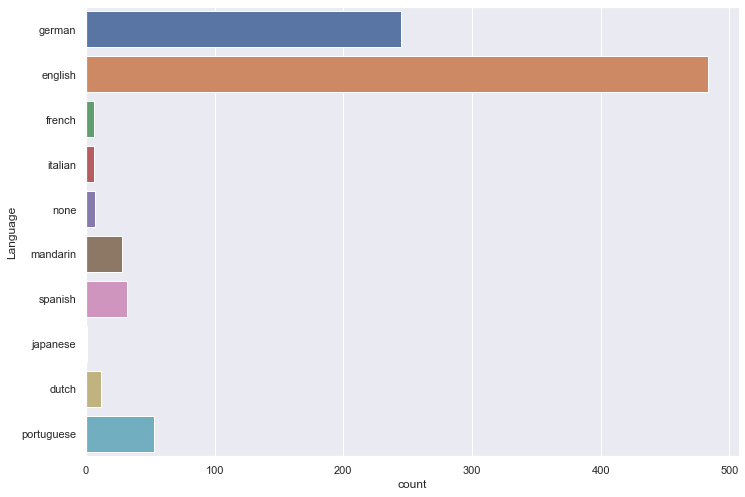

In [50]:
sns.countplot(y='Language', data=df)

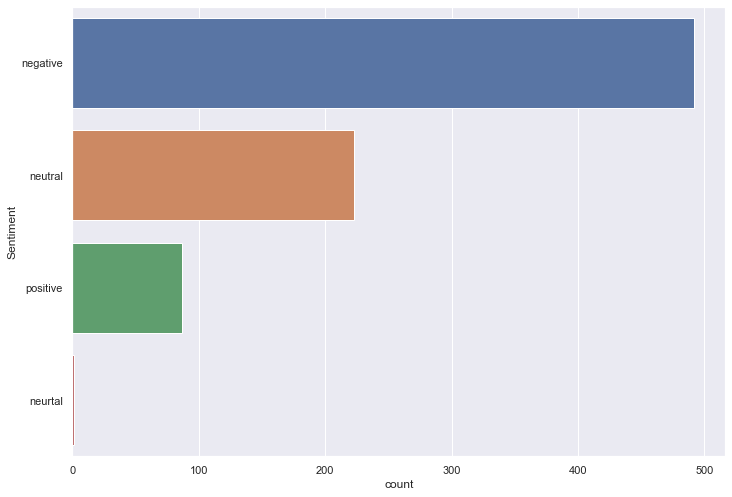

In [71]:
sns.countplot(y='Sentiment', data=df)

In [64]:
df.columns

Index(['Sentiment', 'Translated', 'Satisfied/Helpful', 'Service/Communication',
       'Hardware', 'Software', 'Slow', 'Up-to-date', 'Confusing', 'Helpdesk',
       'Crashing/Broken', 'Issues solving', 'Access', 'Negative', 'Language',
       'Expertise', 'Costs', 'Online / Remote', 'Digitalization', 'Others',
       'Order Process'],
      dtype='object')

In [65]:
topics = ['Satisfied/Helpful', 'Service/Communication',
       'Hardware', 'Software', 'Slow', 'Up-to-date', 'Confusing', 'Helpdesk',
       'Crashing/Broken', 'Issues solving', 'Access', 'Negative', 'Language',
       'Expertise', 'Costs', 'Online / Remote', 'Digitalization',
       'Order Process', 'Others']

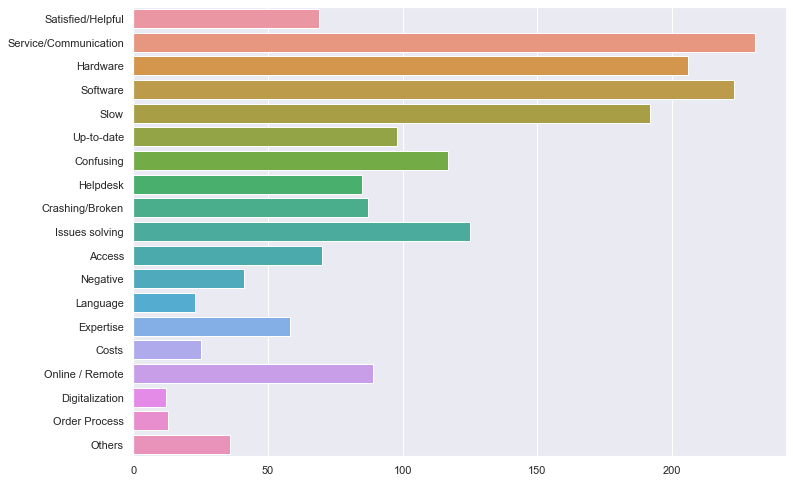

In [66]:
topic_name = []
topic_count = []
for topic in topics:
    topic_name.append(topic)
    topic_count.append(df[topic].value_counts()[1])
    
sns.barplot(y=topic_name, x=topic_count)

In [68]:
topic_sentiment_distr = {}
for topic in topics:
    sentiment_labels = []
    for _, row in df.iterrows():
        if row[topic] == 1:
            sentiment_labels.append(row['Sentiment'])
            
    topic_sentiment_distr[topic] = sentiment_labels

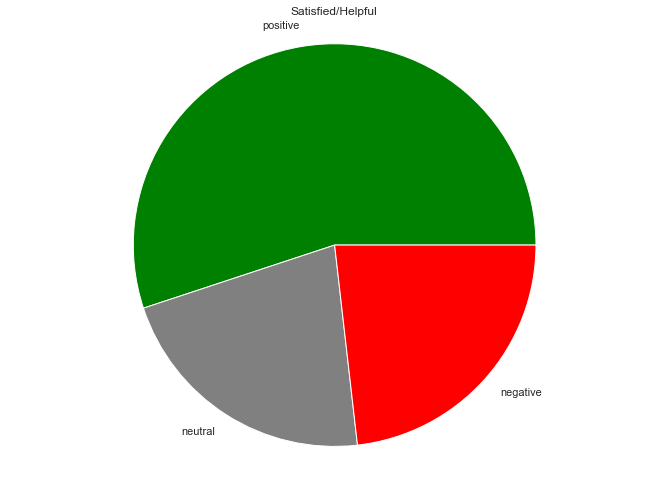

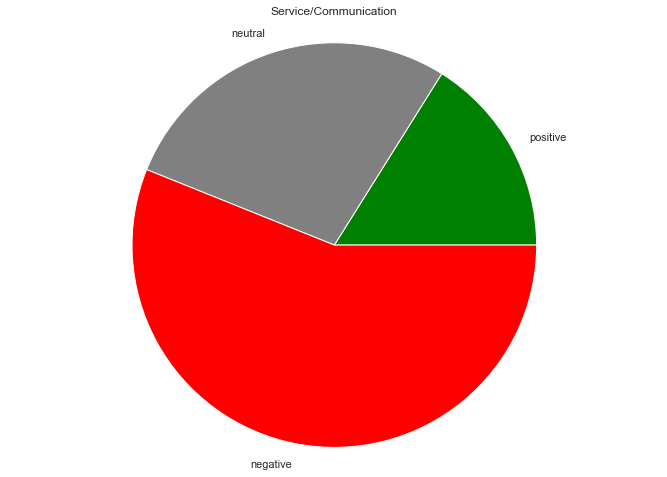

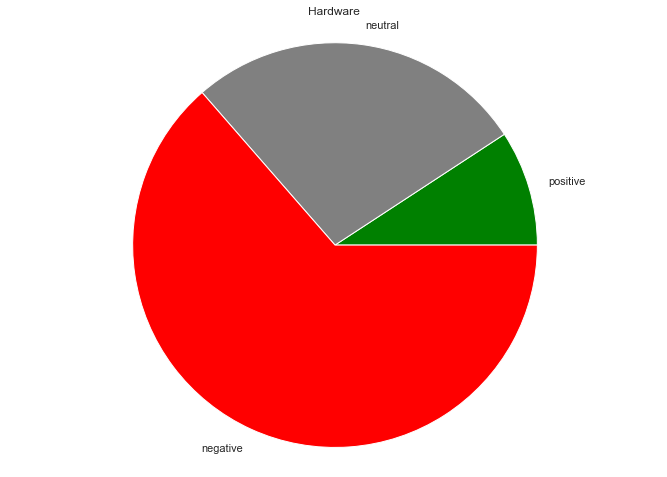

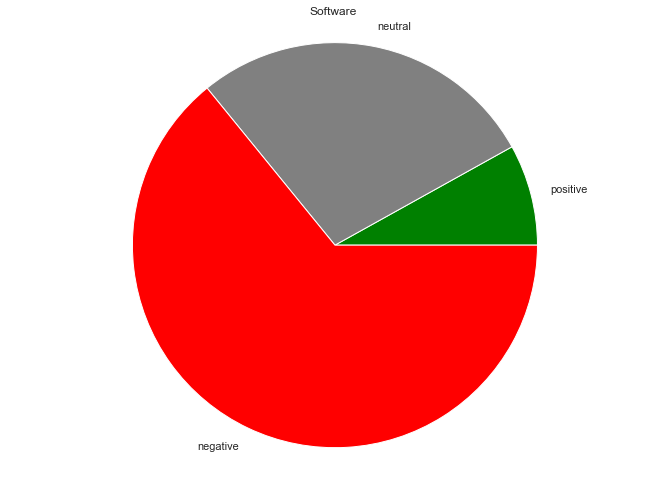

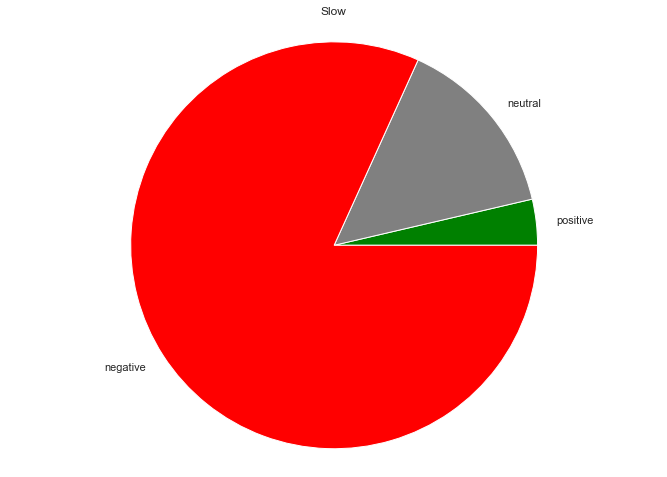

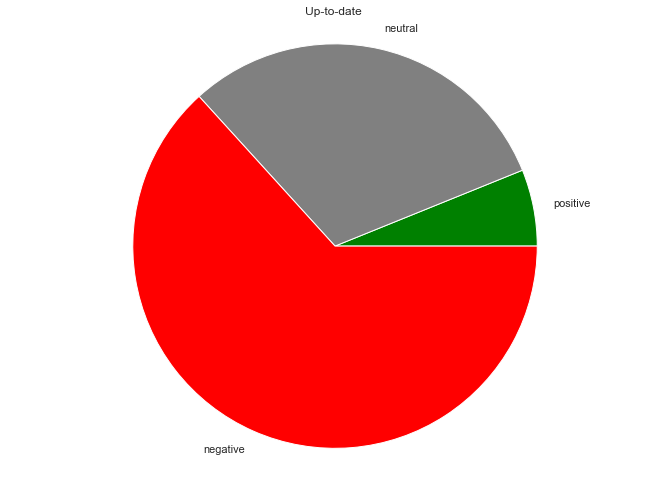

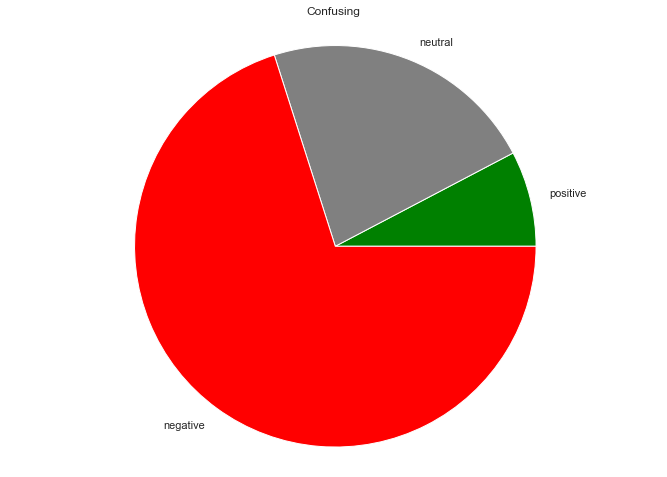

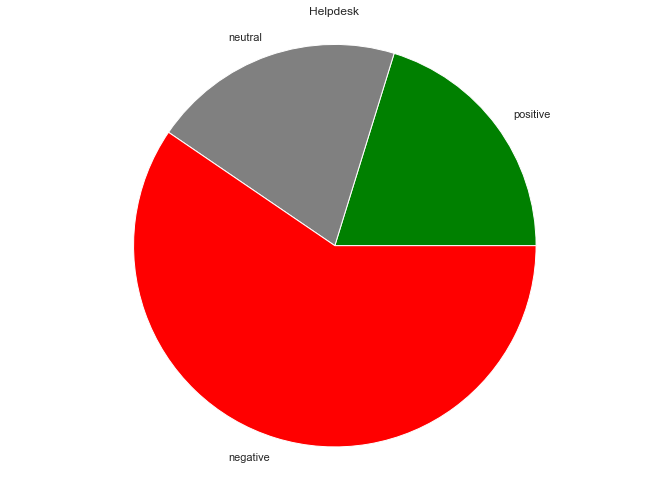

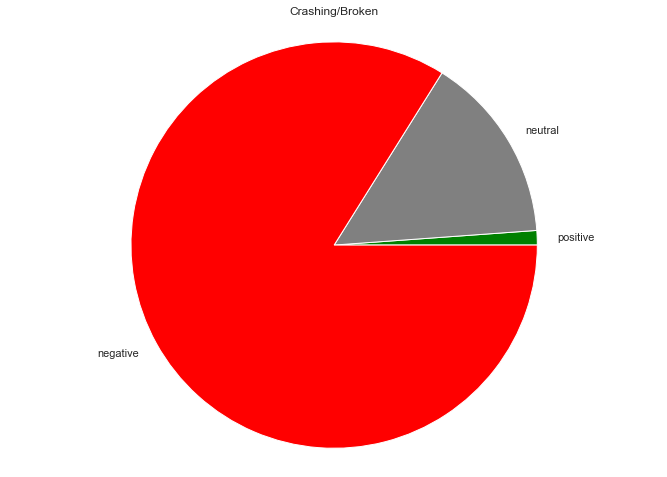

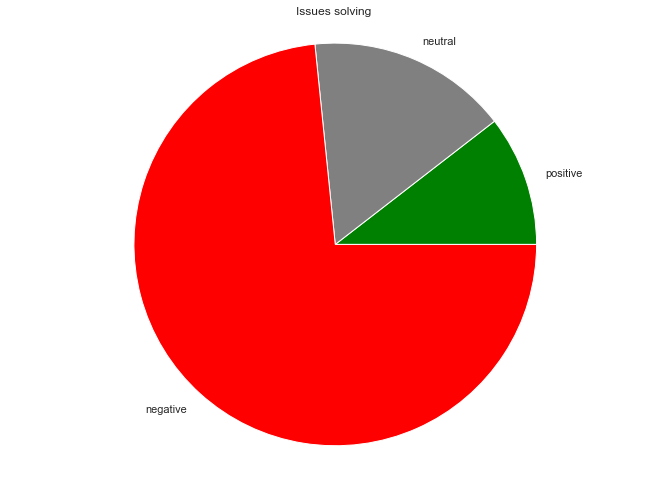

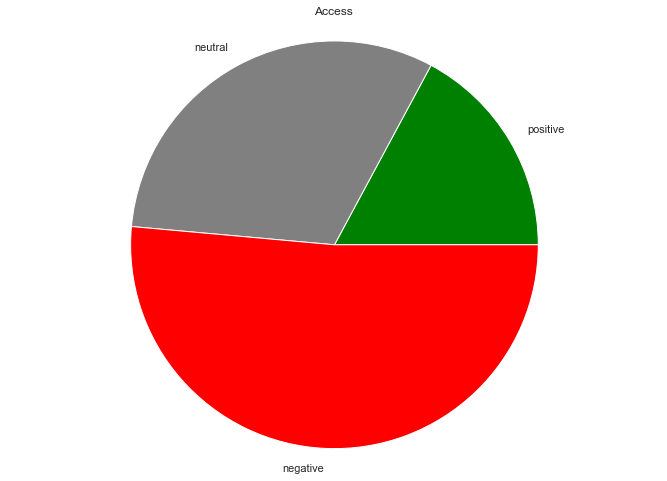

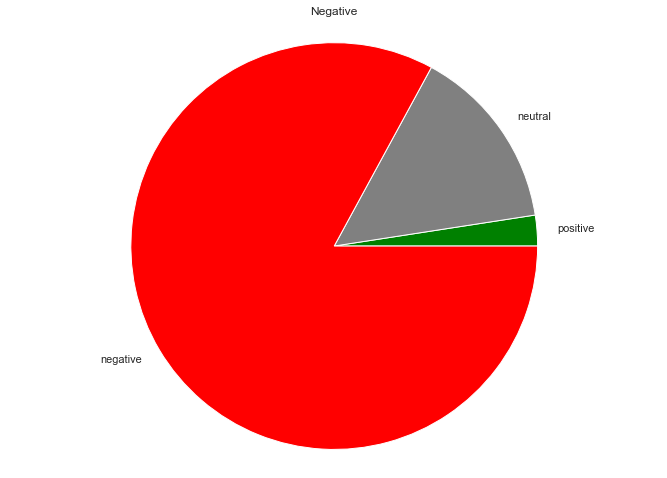

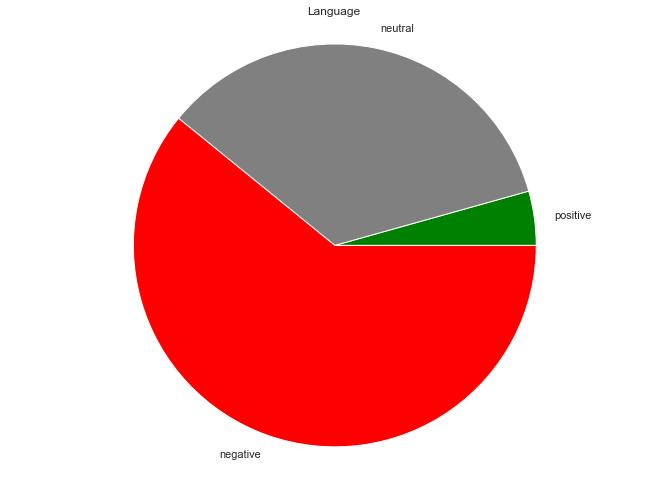

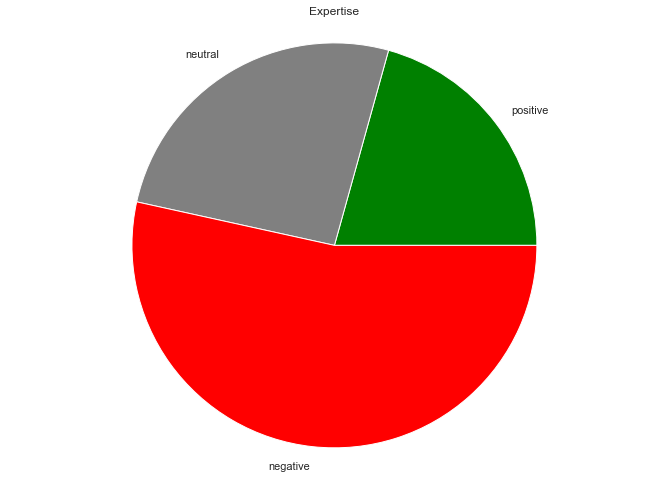

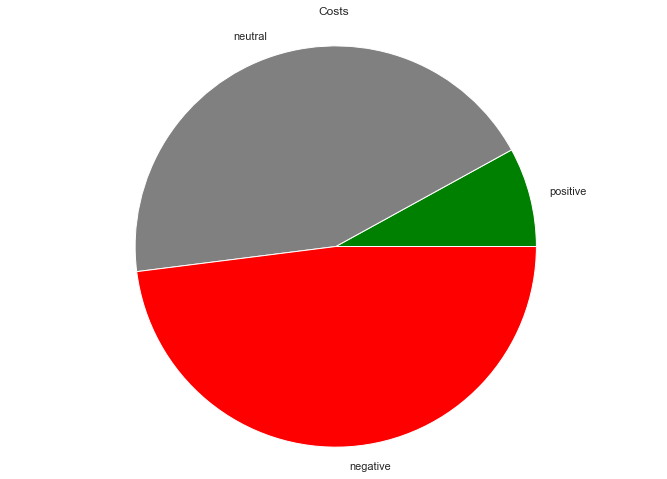

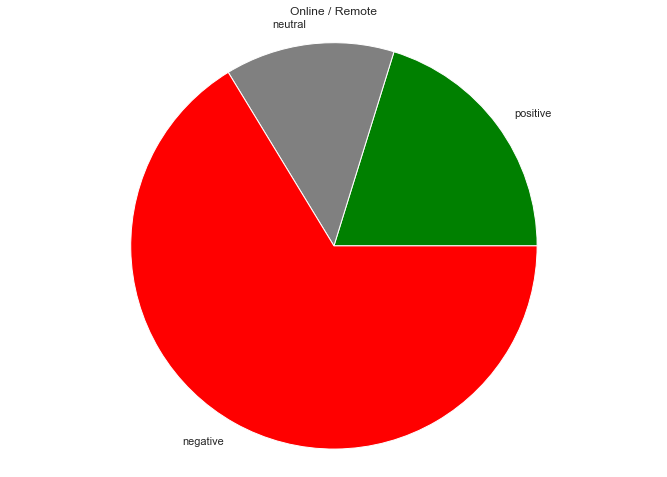

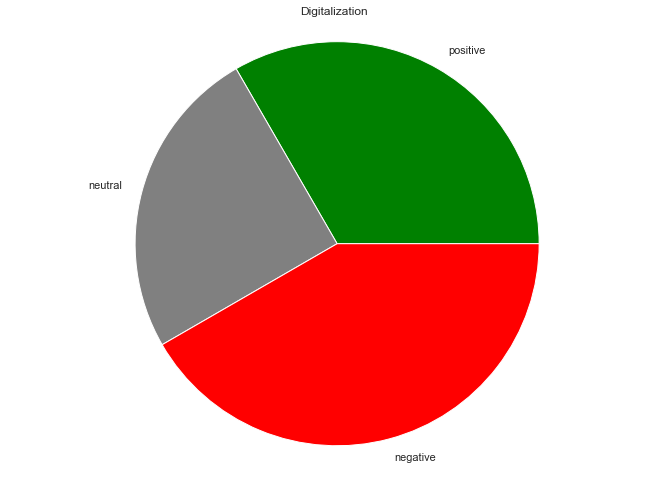

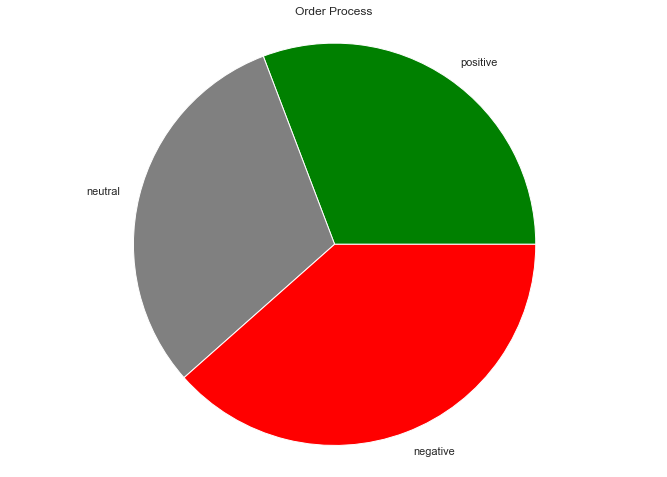

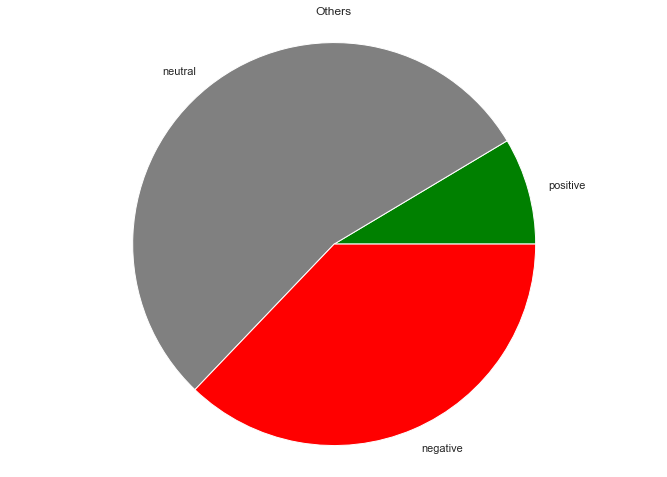

In [69]:
for topic, sentiment_labels in topic_sentiment_distr.items():
    count_labels = Counter(sentiment_labels)
    labels = ['positive', 'neutral', 'negative']
    colors = ['green', 'grey', 'red']
    sizes = [count_labels[label] for label in labels]
    fix, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors)
    ax.axis('equal')
    ax.set_title(topic)
    plt.show()

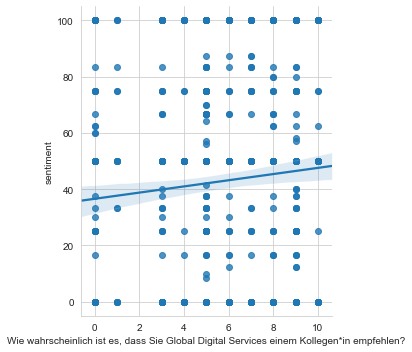

In [40]:
sns.lmplot(x='Wie wahrscheinlich ist es, dass Sie Global Digital Services einem Kollegen*in empfehlen?',
              y='sentiment', data=df)

In [67]:
sns.distplot(df['sentiment'])

KeyError: 'sentiment'

In [54]:
from scipy.stats import spearmanr
spearmanr(nps_scores, df['sentiment'])

SpearmanrResult(correlation=0.08155382141986432, pvalue=0.015943811193354175)